<a href="https://colab.research.google.com/github/jinannisar/NLP-football-tweets/blob/main/CVNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Processing

In [ ]:
import numpy as np
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

import re
import string

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#loading the dataset
df_tweets = pd.read_csv("fifa_world_cup_2022_tweets.csv")
df_tweets.Tweet=df_tweets.Tweet.astype(str)

#Displaying first 5 rows of dataset
df_tweets

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive


In [ ]:
#All columns present in the dataset
print(df_tweets.columns)

Index(['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet',
       'Tweet', 'Sentiment'],
      dtype='object')


In [ ]:
# Calculate label distribution
label_counts = df_tweets['Sentiment'].value_counts()

# Set target label count
target_label_count = 10000 // len(label_counts)

# Filter the dataset to keep desired number of samples for each label
filtered_data = pd.DataFrame()
for label, count in label_counts.items():
    filtered_samples = df_tweets[df_tweets['Sentiment'] == label].sample(n=min(count, target_label_count), random_state=42)
    filtered_data = pd.concat([filtered_data, filtered_samples])

# Shuffle the filtered data
filtered_data = filtered_data.sample(frac=1, random_state=42)
df_tweets = filtered_data

In [ ]:
#hence dropping all other columns except Tweets an Sentiment
df_tweets.drop(['Unnamed: 0','Date Created','Number of Likes','Source of Tweet'],axis=1,inplace=True)

#confirming changes
df_tweets.head(5)

,Tweet,Sentiment
12759,Scenes: Fireworks show at the end of the #Worl...,neutral
14801,"Lineker, STFU and get on with the football. Co...",negative
1263,In case you missed the opening of the #WorldCu...,positive
9167,Blimey only took 3 mins to see corruption in t...,negative
11677,Nobody's asking the most important question ab...,neutral


In [ ]:
# Create a dictionary to map Sentiment to a numerical value.
class_map = {
    "negative": 0,
    "neutral" : 1,
    "positive": 2
}

#New clumn class for the mapped data
df_tweets['class'] = df_tweets.Sentiment.map(class_map)

#Dropping sentiment Column
df_tweets.drop(columns = ['Sentiment'], inplace = True)

#confirming changes
df_tweets.head(5)

,Tweet,class
12759,Scenes: Fireworks show at the end of the #Worl...,1
14801,"Lineker, STFU and get on with the football. Co...",0
1263,In case you missed the opening of the #WorldCu...,2
9167,Blimey only took 3 mins to see corruption in t...,0
11677,Nobody's asking the most important question ab...,1


In [ ]:
# List of Contractions to be removed
contractions = {
    "a'ight":"alright",
    "ain't":"are not",
    "amn't":"am not",
    "aren't":"are not",
    "can't":"cannot",
    "'cause": "because",
    "could've":"could have",
    "couldn't":"could not",
    "couldn't've":"could not have",
    "daren't":"dare not",
    "daresn't":"dare not",
    "dasn't":"dare not",
    "didn't":"did not",
    "doesn't":"does not",
    "don't":"do not",
    "everybody's":"everybody is",
    "everyone's":"everyone is",
    "giv'n":"given",
    "gonna":"going to",
    "gon't":"go not",
    "gotta":"got to",
    "hadn't":"had not",
    "had've":"had have",
    "hasn't":"has not",
    "haven't":"have not",
    "he'd":"he had",
    "he'll":"he will",
    "he's":"he is",
    "here's":"here is",
    "how'd":"how did",
    "how'll":"how will",
    "how're":"how are",
    "how's":"how is",
    "I'd":"I had",
    "I'd've":"I would have",
    "I'd'nt":"I would not",
    "I'd'nt've":"I would not have",
    "I'll":"I will",
    "I'm":"I am",
    "I've":"I have",
    "isn't":"is not",
    "it'd":"it would",
    "it'll":"it will",
    "it's":"it is",
    "let's":"let us",
    "ma'am":"madam",
    "mayn't":"may not",
    "may've":"may have",
    "mightn't":"might not",
    "might've":"might have",
    "mustn't":"must not",
    "mustn't've":"must not have",
    "must've":"must have",
    "needn't":"need not",
    "needn't've":"need not have",
    "o'clock":"of the clock",
    "oughtn't":"ought not",
    "oughtn't've":"ought not have",
    "shan't":"shall not",
    "she'd":"she would",
    "she'll":"she will",
    "she's":"she is",
    "should've":"should have",
    "shouldn't":"should not",
    "shouldn't've":"should not have",
    "somebody's":"somebody is",
    "someone's":"someone is",
    "something's":"something is",
    "so're":"so are",
    "so’s":"so is",
    "so’ve":"so have",
    "that'll":"that will",
    "that're":"that are",
    "that's":"that is",
    "that'd":"that would",
    "there'd":"there would",
    "there'll":"there will",
    "there're":"there are",
    "there's":"there is",
    "these're":"these are",
    "these've":"these have",
    "they'd":"they would",
    "they'll":"they will",
    "they're":"they are",
    "they've":"they have",
    "this's":"this is",
    "those're":"those are",
    "those've":"those have",
    "to've":"to have",
    "wasn't":"was not",
    "we'd":"we would",
    "we'd've":"we would have",
    "we'll":"we will",
    "we're":"we are",
    "we've":"we have",
    "weren't":"were not",
    "what'd":"what did",
    "what'll":"what will",
    "what're":"what are",
    "what's":"what is",
    "what've":"what have",
    "when's":"when is",
    "where'd":"where did",
    "where'll":"where will",
    "where're":"where are",
    "where's":"where is",
    "where've":"where have",
    "which'd":"which would",
    "which'll":"which will",
    "which're":"which are",
    "which's":"which is",
    "which've":"which have",
    "who'd":"who would",
    "who'd've":"who would have",
    "who'll":"who will",
    "who're":"who are",
    "who's":"who is",
    "who've":"who have",
    "why'd":"why did",
    "why're":"why are",
    "why's":"why is",
    "won't":"will not",
    "would've":"would have",
    "wouldn't":"would not",
    "wouldn't've":"would not have",
    "y'at":"you at",
    "yes’m":"yes madam",
    "you'd":"you would",
    "you'll":"you will",
    "you're":"you are",
    "you've":"you have"
}

In [ ]:
# List of abbreviations to be replaced
abbreviations = {
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
# method to expand contractions like "ain't" or "don't"
def expand_contractions(sentence):
    expanded_words=[]
    words=sentence.split()
    # if the words of a sentence are a key in contractions map then replace it with the corresponding value
    expanded_words = [contractions[w.lower()] if w.lower() in contractions.keys() else w for w in words]
    return " ".join(expanded_words)

In [ ]:
#method to expand abbreviations like "asap" or "idc"
def expand_abbreviations(sentence):
    unabreviated_words=[]
    words=sentence.split()
    # if the words of a sentence are a key in abbreviations map then replace it with the corresponding value
    unabreviated_words= [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return " ".join(unabreviated_words)

In [ ]:
import nltk
from nltk.stem import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')

# Snowball stemming method
# includes multiple langauges unlike porter stemmer

def snowball_stemming(words):
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

# Porter stemming method
# based on a set of heuristics that are used to remove common suffixes from words
def porter_stemming(words):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

# Lancaster stemming method
# more aggressive stemmer and it is less accurate
def lancaster_stemming(words):
    stemmer = LancasterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

# Lemmatization method
# similar to stemming but it brings context to the words and is hence preffered
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(sentence, number):

    sentence = sentence.lower()

    pattern = re.compile('https?://\S+')
    sentence = pattern.sub('', sentence)
    sentence = re.sub(r'(^|\s)@(\w+)', '', sentence)
    #sentence = " ".join(filter(lambda x:x[0]!='@', sentence.split()))
    emo = re.compile("["
                           u"\U0001F600-\U0001FFFF"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE
                    )
    sentence = emo.sub(r'', sentence)
    sentence = sentence.lower()
    sentence = expand_contractions(sentence)
    sentence = expand_abbreviations(sentence)
    sentence = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", sentence)
    tokens = word_tokenize(sentence)
    if number == 0:
      tokens = snowball_stemming(tokens)
    elif number == 1:
      tokens = porter_stemming(tokens)
    elif number == 2:
      tokens = lancaster_stemming(tokens)
    elif number == 3:
      tokens = lemmatize_words(tokens)
    else:
      return
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words("english"))
    words = [w for w in words if not w in stop_words]
    return " ".join(words)

#applying clean_text function to all tweets from dataset
df_tweets['cleaned_tweets'] = df_tweets['Tweet'].apply(lambda x: clean_text(x, 0))
df_tweets_snowball = df_tweets.copy()
df_tweets['cleaned_tweets'] = df_tweets['Tweet'].apply(lambda x: clean_text(x, 3))
df_tweets_lemmatize = df_tweets.copy()

#note that porter is using lemmaatization instead

In [ ]:
df_tweets_snowball = df_tweets_snowball.dropna(how='any',axis=0)
df_tweets_lemmatize = df_tweets_lemmatize.dropna(how='any',axis=0)
df_tweets_snowball

,Tweet,class,cleaned_tweets
12759,Scenes: Fireworks show at the end of the #Worl...,1,scene firework show end open ceremoni
14801,"Lineker, STFU and get on with the football. Co...",0,linek stfu get footbal cos know say dicki bird...
1263,In case you missed the opening of the #WorldCu...,2,case miss open worldcup
9167,Blimey only took 3 mins to see corruption in t...,0,blimey onli took min see corrupt
11677,Nobody's asking the most important question ab...,1,nobodi ask import question world cup come home...
...,...,...,...
18185,Who do you think will win the @FIFAWorldCup? I...,1,think win think worldcup fifa brazil footbal b...
47,@MEXC_Global World Cup + England\n#MEXCWorldCu...,1,world cup england
11477,Will Qatar get worked by Ecuador or what are w...,1,qatar get work ecuador think
16777,@MEXC_Global World cup \nMy Favourite team Eng...,2,world cup favourit team england


In [ ]:
df_tweets_lemmatize

,Tweet,class,cleaned_tweets
12759,Scenes: Fireworks show at the end of the #Worl...,1,scene firework show end opening ceremony
14801,"Lineker, STFU and get on with the football. Co...",0,lineker stfu get football co know say dicky bi...
1263,In case you missed the opening of the #WorldCu...,2,case missed opening worldcup
9167,Blimey only took 3 mins to see corruption in t...,0,blimey took min see corruption
11677,Nobody's asking the most important question ab...,1,nobody asking important question world cup com...
...,...,...,...
18185,Who do you think will win the @FIFAWorldCup? I...,1,think win think worldcup fifa brazil football ...
47,@MEXC_Global World Cup + England\n#MEXCWorldCu...,1,world cup england
11477,Will Qatar get worked by Ecuador or what are w...,1,qatar get worked ecuador thinking
16777,@MEXC_Global World cup \nMy Favourite team Eng...,2,world cup favourite team england


In [ ]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 12759 to 5710
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweet           9999 non-null   object
 1   class           9999 non-null   int64 
 2   cleaned_tweets  9999 non-null   object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [ ]:
df_tweets['class'] = df_tweets['class'].astype(int)
df_tweets

,Tweet,class,cleaned_tweets
12759,Scenes: Fireworks show at the end of the #Worl...,1,scene firework show end opening ceremony
14801,"Lineker, STFU and get on with the football. Co...",0,lineker stfu get football co know say dicky bi...
1263,In case you missed the opening of the #WorldCu...,2,case missed opening worldcup
9167,Blimey only took 3 mins to see corruption in t...,0,blimey took min see corruption
11677,Nobody's asking the most important question ab...,1,nobody asking important question world cup com...
...,...,...,...
18185,Who do you think will win the @FIFAWorldCup? I...,1,think win think worldcup fifa brazil football ...
47,@MEXC_Global World Cup + England\n#MEXCWorldCu...,1,world cup england
11477,Will Qatar get worked by Ecuador or what are w...,1,qatar get worked ecuador thinking
16777,@MEXC_Global World cup \nMy Favourite team Eng...,2,world cup favourite team england


In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the data into test and train
X_trainS, X_testS, y_trainS, y_testS = train_test_split(df_tweets_snowball['cleaned_tweets'], df_tweets_snowball['class'], test_size=0.3, random_state=0)
X_trainP, X_testP, y_trainP, y_testP = train_test_split(df_tweets_lemmatize['cleaned_tweets'], df_tweets_lemmatize['class'], test_size=0.3, random_state=0)

# Text Representation
### Bag of Words (BOW)

In [ ]:
#Text representation

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
np.set_printoptions(threshold=np.inf)

# BAG OF WORDS

# Create an instance of CountVectorizer
bow_vectorizerS = CountVectorizer()
bow_vectorizerP = CountVectorizer()

# Fit the vectorizer on the tweet data
X_trainS_bow = bow_vectorizerS.fit_transform(X_trainS)
X_testS_bow = bow_vectorizerS.transform(X_testS)

X_trainP_bow = bow_vectorizerP.fit_transform(X_trainP)
X_testP_bow = bow_vectorizerP.transform(X_testP)

# Get the feature names directly from the vectorizer's vocabulary
bowS_feature_names = bow_vectorizerS.vocabulary_.keys()
bowP_feature_names = bow_vectorizerP.vocabulary_.keys()


# Print the feature names
# print("Feature names:")
# print(list(feature_names))

# Print the BoW representation of all tweets
# for i in range(len(tweets)):
#     tweet_bow = bow_vectors[i].toarray()
#     print(f"BoW representation of tweet {i+1}:")
#     print(tweet_bow)
#     print("")

### TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF

# Initialize the TfidfVectorizer object with desired parameters
tfidf_vectorizerS = TfidfVectorizer()
tfidf_vectorizerP = TfidfVectorizer()

# Fit the vectorizer on the tweet data
X_trainS_tfidf = tfidf_vectorizerS.fit_transform(X_trainS)
X_testS_tfidf = tfidf_vectorizerS.transform(X_testS)

X_trainP_tfidf = tfidf_vectorizerP.fit_transform(X_trainP)
X_testP_tfidf = tfidf_vectorizerP.transform(X_testP)

# Get the vocabulary (feature names) from the vectorizer
tfidf_vocabularyS = tfidf_vectorizerS.vocabulary_
tfidf_vocabularyP = tfidf_vectorizerP.vocabulary_

if tfidf_vocabularyS == tfidf_vocabularyP:
    print("The feature names are the same.")
else:
    print("The feature names are different.")

# Print the TF-IDF representation of each document
# num_docs, num_features = X_train_tfidf.shape
# for i in range(num_docs):
#     #print(f"TF-IDF representation for document {i+1}:")
#     doc = X_train_tfidf[i]
#     feature_indices = doc.indices
#     tfidf_scores = doc.data
#     for j in range(len(feature_indices)):
#         feature_index = feature_indices[j]
#         tfidf_score = tfidf_scores[j]
#         feature_name = list(vocabulary.keys())[
#             list(vocabulary.values()).index(feature_index)
#         ]
#         #print(f"{feature_name}: {tfidf_score}")
#     #print()


The feature names are different.


#### Bag of Bigrams

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Extract the 'tweet' column as text data
# tweets = df_tweets['cleaned_tweets']

# Define the vectorizer for Bag of Bigrams
bigram_vectorizerS = CountVectorizer(ngram_range=(2, 2))
bigram_vectorizerP = CountVectorizer(ngram_range=(2, 2))

# Fit the vectorizer on the tweet data
X_trainS_bob = bigram_vectorizerS.fit_transform(X_trainS)
X_testS_bob = bigram_vectorizerS.transform(X_testS)

X_trainP_bob = bigram_vectorizerP.fit_transform(X_trainP)
X_testP_bob = bigram_vectorizerP.transform(X_testP)

# Get the vocabulary (bigrams)
bigramS_vocabulary = bigram_vectorizerS.vocabulary_.keys()
bigramP_vocabulary = bigram_vectorizerP.vocabulary_.keys()

if bigramS_vocabulary == bigramP_vocabulary:
    print("The feature names are the same.")
else:
    print("The feature names are different.")

# Iterate through each document and print its bigram representation
# for i, document in enumerate(tweets):
#     print("Tweet", i + 1, "Bigram Representation:")
#     for feature in bigram_vocabulary:
#         count = bigram_matrix[i, bigram_vectorizer.vocabulary_[feature]]
#         if count > 0:
#             print(feature, "-", count)
#     print()

The feature names are different.


#### Visualization Stuff

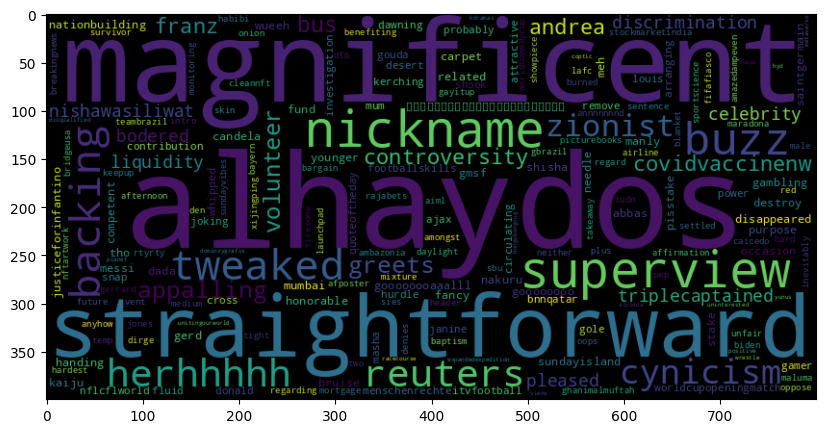

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

##BoW + TF-IDF for P
word_frequencies = {}
# Add TF-IDF word frequencies
for feature, freq in zip(tfidf_vocabularyP, X_trainP_tfidf.sum(axis=0).tolist()[0]):
    word_frequencies[feature] = word_frequencies.get(feature, 0) + freq

# Add Bag-of-Words word frequencies
for feature, freq in zip(bowP_feature_names, X_trainP_bow.sum(axis=0).tolist()[0]):
    word_frequencies[feature] = word_frequencies.get(feature, 0) + freq

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_frequencies)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

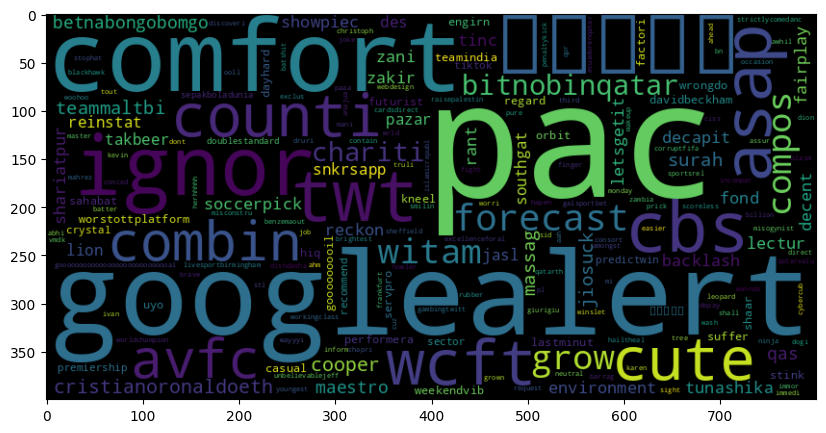

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

##BoW + TF-IDF for S
word_frequencies = {}
# Add TF-IDF word frequencies
for feature, freq in zip(tfidf_vocabularyS, X_trainS_tfidf.sum(axis=0).tolist()[0]):
    word_frequencies[feature] = word_frequencies.get(feature, 0) + freq

# Add Bag-of-Words word frequencies
for feature, freq in zip(bowS_feature_names, X_trainS_bow.sum(axis=0).tolist()[0]):
    word_frequencies[feature] = word_frequencies.get(feature, 0) + freq

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_frequencies)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

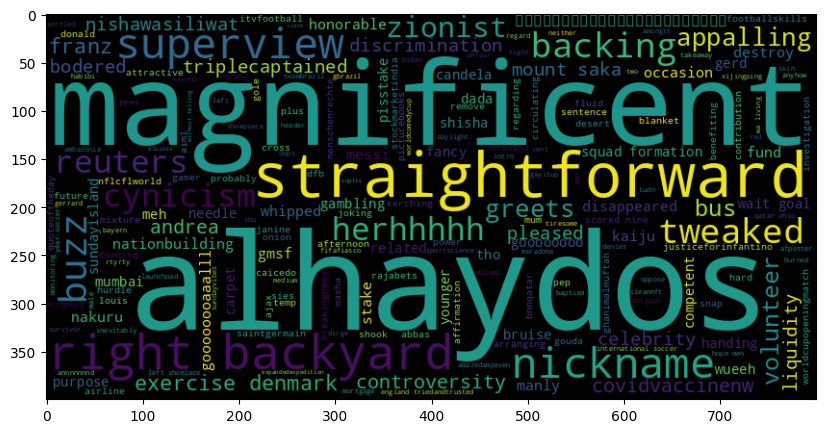

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

##BoW + TF-IDF for P
word_frequencies = {}
# Add TF-IDF word frequencies
for feature, freq in zip(tfidf_vocabularyP, X_trainP_tfidf.sum(axis=0).tolist()[0]):
    word_frequencies[feature] = word_frequencies.get(feature, 0) + freq

# Add Bag-of-Words word frequencies
for feature, freq in zip(bowP_feature_names, X_trainP_bow.sum(axis=0).tolist()[0]):
    word_frequencies[feature] = word_frequencies.get(feature, 0) + freq

# Add Bag-of-Bigrams word frequencies
for feature, freq in zip(bigramP_vocabulary, X_trainP_bob.sum(axis=0).tolist()[0]):
    word_frequencies[feature] = word_frequencies.get(feature, 0) + freq

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_frequencies)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

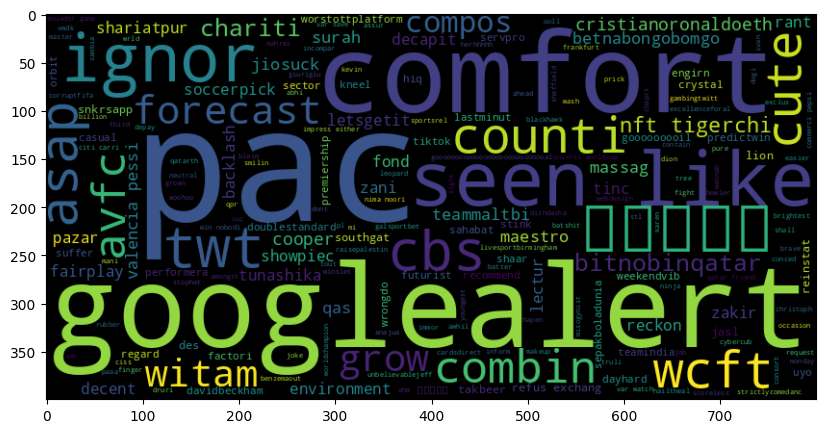

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

##BoW + TF-IDF for P
word_frequencies = {}
# Add TF-IDF word frequencies
for feature, freq in zip(tfidf_vocabularyS, X_trainS_tfidf.sum(axis=0).tolist()[0]):
    word_frequencies[feature] = word_frequencies.get(feature, 0) + freq

# Add Bag-of-Words word frequencies
for feature, freq in zip(bowS_feature_names, X_trainS_bow.sum(axis=0).tolist()[0]):
    word_frequencies[feature] = word_frequencies.get(feature, 0) + freq

# Add Bag-of-Bigrams word frequencies
for feature, freq in zip(bigramS_vocabulary, X_trainS_bob.sum(axis=0).tolist()[0]):
    word_frequencies[feature] = word_frequencies.get(feature, 0) + freq

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_frequencies)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

## Machine Learning Model

### Logistic Regression

In [ ]:
#Libraries needed
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from sklearn.metrics import classification_report

#### Experiment 1
Pre-Processing
-	Contractions Removal
-	Abbreviations Removal
-	URL and Emoticon Removal
-	Punctuations, stop words, special characters removal
-	Tokenization
-	Lemmatization

Text Representation
-	TF-IDF
-	Bag of Words

In [ ]:
# Combine TF-IDF and BoW representations using hstack
X_train_combined = hstack([X_trainP_tfidf, X_trainP_bow])
X_test_combined = hstack([X_testP_tfidf, X_testP_bow])

# Train the logistic regression model
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train_combined, y_trainP)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test_combined)

# Calculate and print the accuracies
train_accuracy = lr_model.score(X_train_combined, y_trainP)
test_accuracy = lr_model.score(X_test_combined, y_testP)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9459922846120874
Test Accuracy: 0.6823333333333333


In [ ]:
report = classification_report(y_testP, lr_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1023
           1       0.61      0.65      0.63      1006
           2       0.70      0.70      0.70       971

    accuracy                           0.68      3000
   macro avg       0.69      0.68      0.68      3000
weighted avg       0.69      0.68      0.68      3000



#### Experiment 2
Pre-Processing
-	Contractions Removal
-	Abbreviations Removal
-	URL and Emoticon Removal
-	Punctuations, stop words, special characters removal
-	Tokenization
-	Snowball Stemming

Text Representation
-	TF-IDF
-	Bag of Words

In [ ]:
# Combine TF-IDF and BoW representations using hstack
X_train_combined = hstack([X_trainS_tfidf, X_trainS_bow])
X_test_combined = hstack([X_testS_tfidf, X_testS_bow])

# Train the logistic regression model
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train_combined, y_trainS)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test_combined)

# Calculate and print the accuracies
train_accuracy = lr_model.score(X_train_combined, y_trainS)
test_accuracy = lr_model.score(X_test_combined, y_testS)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9351335905129304
Test Accuracy: 0.6956666666666667


In [ ]:
report = classification_report(y_testS, lr_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1023
           1       0.63      0.67      0.65      1006
           2       0.70      0.71      0.71       971

    accuracy                           0.70      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.70      0.70      0.70      3000



#### Experiment 3
Pre-Processing
-	Contractions Removal
-	Abbreviations Removal
-	URL and Emoticon Removal
-	Punctuations, stop words, special characters removal
-	Tokenization
-	Snowball Stemming

Text Representation
-	TF-IDF
-	Bag of Words
-	Bag of Bigrams

In [ ]:
# Combine TF-IDF and BoW representations using hstack
X_train_combined = hstack([X_trainS_tfidf, X_trainS_bow, X_trainS_bob])
X_test_combined = hstack([X_testS_tfidf, X_testS_bow, X_testS_bob])

# Train the logistic regression model
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train_combined, y_trainS)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test_combined)

# Calculate and print the accuracies
train_accuracy = lr_model.score(X_train_combined, y_trainS)
test_accuracy = lr_model.score(X_test_combined, y_testS)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9861408772681811
Test Accuracy: 0.6963333333333334


In [ ]:
report = classification_report(y_testS, lr_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.69      0.73      1023
           1       0.62      0.68      0.65      1006
           2       0.72      0.72      0.72       971

    accuracy                           0.70      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.70      0.70      0.70      3000



### Support Vector Machine (SVM)

#### Experiment 4
Pre-Processing
-	Contractions Removal
-	Abbreviations Removal
-	URL and Emoticon Removal
-	Punctuations, stop words, special characters removal
-	Tokenization
-	Lemmatization

Text Representation
-	TF-IDF
-	Bag of Words

In [ ]:
# Combine TF-IDF and BoW representations using hstack
X_train_combined = hstack([X_trainP_tfidf, X_trainP_bow])
X_test_combined = hstack([X_testP_tfidf, X_testP_bow])

#Train SVC model
svm_model = SVC()
svm_model.fit(X_train_combined, y_trainP)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test_combined)

# Calculate and print the accuracies
train_accuracy = svm_model.score(X_train_combined, y_trainP)
test_accuracy = svm_model.score(X_test_combined, y_testP)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9131304472067439
Test Accuracy: 0.664


In [ ]:
report = classification_report(y_testP, svm_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.68      0.70      1023
           1       0.58      0.66      0.62      1006
           2       0.72      0.65      0.68       971

    accuracy                           0.66      3000
   macro avg       0.67      0.66      0.67      3000
weighted avg       0.67      0.66      0.67      3000



#### Experiment 5
Pre-Processing
-	Contractions Removal
-	Abbreviations Removal
-	URL and Emoticon Removal
-	Punctuations, stop words, special characters removal
-	Tokenization
-	Snowball Stemming

Text Representation
-	TF-IDF
-	Bag of Words

In [ ]:
# Combine TF-IDF and BoW representations using hstack
X_train_combined = hstack([X_trainS_tfidf, X_trainS_bow])
X_test_combined = hstack([X_testS_tfidf, X_testS_bow])

#Train SVC model
svm_model = SVC()
svm_model.fit(X_train_combined, y_trainS)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test_combined)

# Calculate and print the accuracies
train_accuracy = svm_model.score(X_train_combined, y_trainS)
test_accuracy = svm_model.score(X_test_combined, y_testS)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9118445492213173
Test Accuracy: 0.6813333333333333


In [ ]:
report = classification_report(y_testS, svm_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1023
           1       0.60      0.68      0.64      1006
           2       0.72      0.67      0.69       971

    accuracy                           0.68      3000
   macro avg       0.69      0.68      0.68      3000
weighted avg       0.69      0.68      0.68      3000



#### Experiment 6
Pre-Processing
-	Contractions Removal
-	Abbreviations Removal
-	URL and Emoticon Removal
-	Punctuations, stop words, special characters removal
-	Tokenization
-	Snowball Stemming

Text Representation
-	TF-IDF
-	Bag of Words
-	Bag of Bigrams

In [ ]:
# Combine TF-IDF and BoW representations using hstack
X_train_combined = hstack([X_trainS_tfidf, X_trainS_bow, X_trainS_bob])
X_test_combined = hstack([X_testS_tfidf, X_testS_bow, X_testS_bob])

#Train SVC model
svm_model = SVC()
svm_model.fit(X_train_combined, y_trainS)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test_combined)

# Calculate and print the accuracies
train_accuracy = svm_model.score(X_train_combined, y_trainS)
test_accuracy = svm_model.score(X_test_combined, y_testS)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9289898556936705
Test Accuracy: 0.671


In [ ]:
report = classification_report(y_testS, svm_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.63      0.69      1023
           1       0.58      0.71      0.64      1006
           2       0.72      0.67      0.69       971

    accuracy                           0.67      3000
   macro avg       0.69      0.67      0.67      3000
weighted avg       0.69      0.67      0.67      3000



### Random Forest Classifier

#### Experiment 7
Pre-Processing
-	Contractions Removal
-	Abbreviations Removal
-	URL and Emoticon Removal
-	Punctuations, stop words, special characters removal
-	Tokenization
-	Lemmatization

Text Representation
-	TF-IDF
-	Bag of Words

In [ ]:
# Combine TF-IDF and BoW representations using hstack
X_train_combined = hstack([X_trainP_tfidf, X_trainP_bow])
X_test_combined = hstack([X_testP_tfidf, X_testP_bow])

#Train RF model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined, y_trainP)

#predict
rf_predict = rf_model.predict(X_test_combined)

#calculate accuracy
train_accuracy = rf_model.score(X_train_combined, y_trainP)
test_accuracy = rf_model.score(X_test_combined, y_testP)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9919988569795685
Test Accuracy: 0.6556666666666666


In [ ]:
report = classification_report(y_testP, rf_predict)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      1023
           1       0.58      0.65      0.62      1006
           2       0.67      0.68      0.68       971

    accuracy                           0.66      3000
   macro avg       0.66      0.66      0.66      3000
weighted avg       0.66      0.66      0.66      3000



#### Experiment 8
Pre-Processing
-	Contractions Removal
-	Abbreviations Removal
-	URL and Emoticon Removal
-	Punctuations, stop words, special characters removal
-	Tokenization
-	Snowball Stemming

Text Representation
-	TF-IDF
-	Bag of Words

In [ ]:
# Combine TF-IDF and BoW representations using hstack
X_train_combined = hstack([X_trainS_tfidf, X_trainS_bow])
X_test_combined = hstack([X_testS_tfidf, X_testS_bow])

#Train RF model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined, y_trainS)

#predict
rf_predict = rf_model.predict(X_test_combined)

#calculate accuracy
train_accuracy = rf_model.score(X_train_combined, y_trainS)
test_accuracy = rf_model.score(X_test_combined, y_testS)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9908558365480783
Test Accuracy: 0.6746666666666666


In [ ]:
report = classification_report(y_testS, rf_predict)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.67      0.71      1023
           1       0.60      0.66      0.63      1006
           2       0.69      0.69      0.69       971

    accuracy                           0.67      3000
   macro avg       0.68      0.67      0.68      3000
weighted avg       0.68      0.67      0.68      3000



#### Experiment 9
Pre-Processing
-	Contractions Removal
-	Abbreviations Removal
-	URL and Emoticon Removal
-	Punctuations, stop words, special characters removal
-	Tokenization
-	Snowball Stemming

Text Representation
-	TF-IDF
-	Bag of Words
-	Bag of Bigrams

In [ ]:
# Combine TF-IDF and BoW representations using hstack
X_train_combined = hstack([X_trainS_tfidf, X_trainS_bow, X_trainS_bob])
X_test_combined = hstack([X_testS_tfidf, X_testS_bow, X_testS_bob])

#Train RF model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined, y_trainS)

#predict
rf_predict = rf_model.predict(X_test_combined)

#calculate accuracy
train_accuracy = rf_model.score(X_train_combined, y_trainS)
test_accuracy = rf_model.score(X_test_combined, y_testS)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9914273467638234
Test Accuracy: 0.6706666666666666


In [ ]:
report = classification_report(y_testS, rf_predict)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.63      0.70      1023
           1       0.59      0.69      0.64      1006
           2       0.68      0.68      0.68       971

    accuracy                           0.67      3000
   macro avg       0.68      0.67      0.67      3000
weighted avg       0.68      0.67      0.67      3000



### MNB (For Fun)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Combine TF-IDF and BoW representations using hstack
X_train_combined = hstack([X_trainP_tfidf, X_trainP_bow])
X_test_combined = hstack([X_testP_tfidf, X_testP_bow])

#Train RF model
mnb_model = MultinomialNB()
mnb_model.fit(X_train_combined, y_trainP)

#predict
mnb_predict = mnb_model.predict(X_test_combined)

#calculate accuracy
train_accuracy = mnb_model.score(X_train_combined, y_trainP)
test_accuracy = mnb_model.score(X_test_combined, y_testP)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.8309758536933848
Test Accuracy: 0.677


In [ ]:
report = classification_report(y_testS, mnb_predict)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1023
           1       0.65      0.54      0.59      1006
           2       0.71      0.70      0.71       971

    accuracy                           0.68      3000
   macro avg       0.68      0.68      0.67      3000
weighted avg       0.68      0.68      0.67      3000



In [ ]:
# Combine TF-IDF and BoW representations using hstack
X_train_combined = hstack([X_trainS_tfidf, X_trainS_bow])
X_test_combined = hstack([X_testS_tfidf, X_testS_bow])

#Train RF model
mnb_model = MultinomialNB()
mnb_model.fit(X_train_combined, y_trainS)

#predict
mnb_predict = mnb_model.predict(X_test_combined)

#calculate accuracy
train_accuracy = mnb_model.score(X_train_combined, y_trainS)
test_accuracy = mnb_model.score(X_test_combined, y_testS)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.8199742820402914
Test Accuracy: 0.6806666666666666


In [ ]:
report = classification_report(y_testS, mnb_predict)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.81      0.74      1023
           1       0.64      0.54      0.59      1006
           2       0.72      0.69      0.71       971

    accuracy                           0.68      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.68      0.68      0.68      3000

